In [42]:
# import delle librerie

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# leggo il dataframe

train_df = pd.read_csv(f'drive/MyDrive/Tesina/archive/train.csv')

In [44]:
# stampo il dataset

print(train_df)

    No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0    1      wax         6             4.0         unworn                 yes   
1    2      wax        20             4.0         unworn                 yes   
2    3      wax         6             3.0         unworn                 yes   
3    4      wax         6             2.5         unworn                  no   
4    5      wax        20             3.0         unworn                  no   
5    6      wax         6             4.0           worn                 yes   
6    7      wax        20             4.0           worn                  no   
7    8      wax        20             4.0           worn                 yes   
8    9      wax        15             4.0           worn                 yes   
9   10      wax        12             4.0           worn                 yes   
10  11      wax         3             4.0         unworn                 yes   
11  12      wax         3             3.

In [26]:
# analizzo i tipi di dato per colonna

train_df.dtypes

,0
No,int64
material,object
feedrate,int64
clamp_pressure,float64
tool_condition,object
machining_finalized,object
passed_visual_inspection,object


In [27]:
# identifico eventuali valori nulli

train_df.isnull().sum()

,0
No,0
material,0
feedrate,0
clamp_pressure,0
tool_condition,0
machining_finalized,0
passed_visual_inspection,4


In [45]:
# seleziono le righe di train_data in cui machining_finalized è no, e prendo anche i valori della colonna passed_visual_inspection
# dimostro quindi che quando il machining non è completato, non è disponibile la visual inspection

righe_selezionate = train_df[train_df['machining_finalized'] == 'no'][['passed_visual_inspection', 'machining_finalized']]
print(righe_selezionate)

   passed_visual_inspection machining_finalized
3                       NaN                  no
4                       NaN                  no
6                       NaN                  no
15                      NaN                  no


In [46]:
# dato che il NaN in passed_visual_inspection si ha quando il machining non è completato, ciò significa che anche la visual inspection non è passata
# sostituisco dunque i valori Nan con no

train_df['passed_visual_inspection'] = train_df['passed_visual_inspection'].fillna('no')

In [47]:
# controllo che tutto si sia aggiornato bene

print(train_df)

    No material  feedrate  clamp_pressure tool_condition machining_finalized  \
0    1      wax         6             4.0         unworn                 yes   
1    2      wax        20             4.0         unworn                 yes   
2    3      wax         6             3.0         unworn                 yes   
3    4      wax         6             2.5         unworn                  no   
4    5      wax        20             3.0         unworn                  no   
5    6      wax         6             4.0           worn                 yes   
6    7      wax        20             4.0           worn                  no   
7    8      wax        20             4.0           worn                 yes   
8    9      wax        15             4.0           worn                 yes   
9   10      wax        12             4.0           worn                 yes   
10  11      wax         3             4.0         unworn                 yes   
11  12      wax         3             3.

In [31]:
# calcolo le statistiche descrittive per feedrate

train_df['feedrate'].describe()

,feedrate
count,18.000000
mean,9.722222
std,7.282578
min,3.000000
25%,3.000000
50%,6.000000
75%,18.750000
max,20.000000


In [32]:
# calcolo le statistiche descrittive per clamp pressure

train_df['clamp_pressure'].describe()

,clamp_pressure
count,18.000000
mean,3.416667
std,0.624264
min,2.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,4.000000


In [48]:
# creo una funzione che come parametro prenda il nome di una colonna e ritorni il grafico a barre di come sono distribuiti i dati di quella colonna

def plot_column(column_name):
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column_name, data=train_df, width = 0.6)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

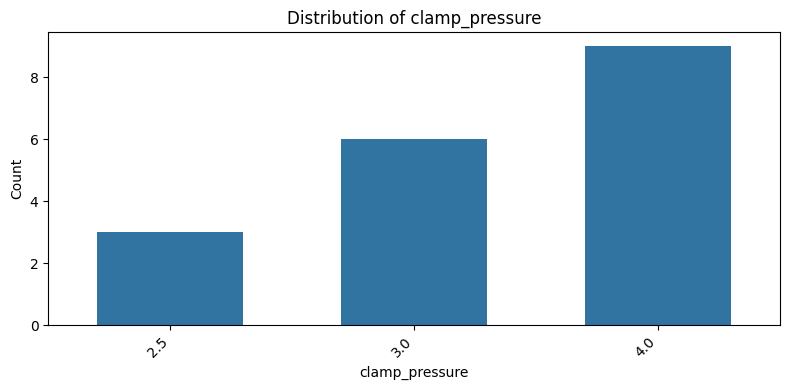

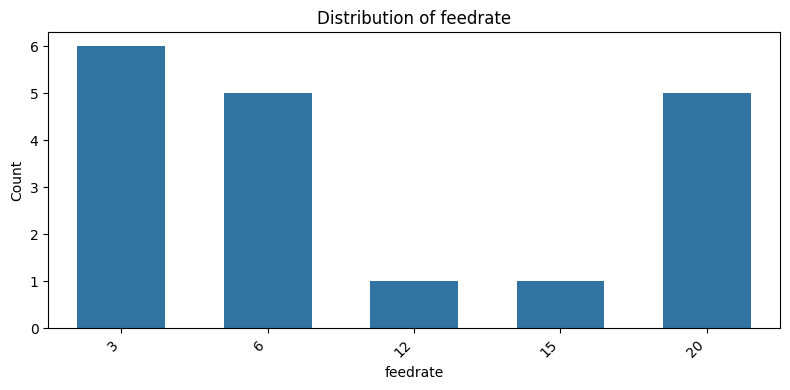

In [49]:
# uso funzione con le colonne clamp_pressure e feedrate
plot_column('clamp_pressure')
plot_column('feedrate')

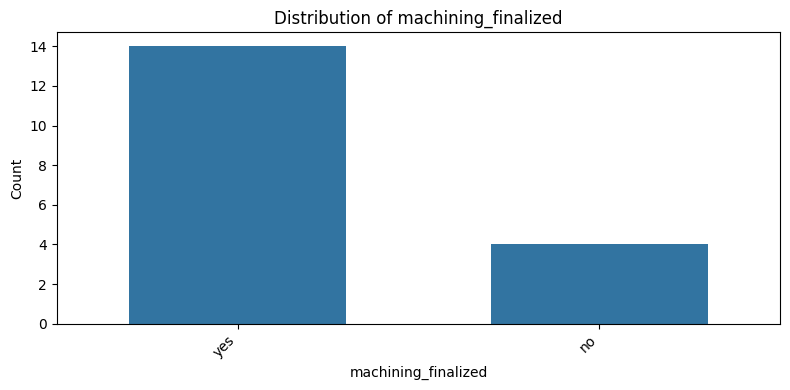

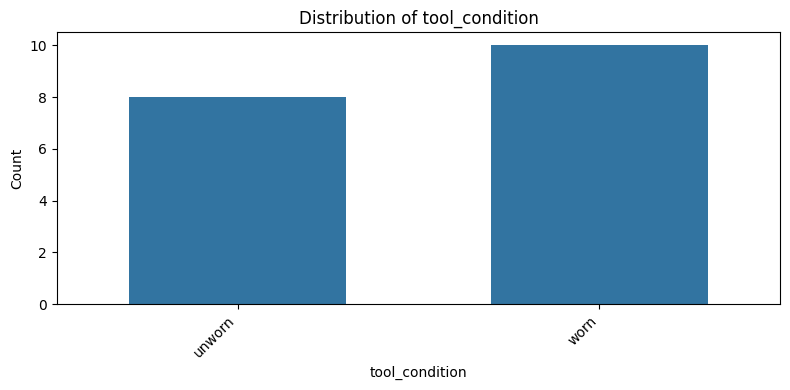

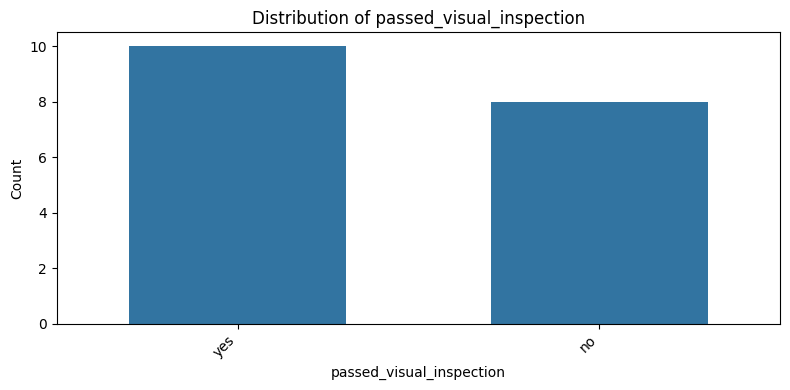

In [35]:
# uso funzione con altre colonne
plot_column('machining_finalized')
plot_column('tool_condition')
plot_column('passed_visual_inspection')

In [50]:
# mappo i valori che sono stringhe in valori binari. Aggiungo al train_df le colonne di tipo binario
# se non rendessi binari questi valori, il metodo corr darebbe errore, perché sto usando delle stringhe

# indico unworn con 0 e worn con 1
tool_condition_map = {'unworn': 0, 'worn': 1}
train_df['tool_condition'] = train_df['tool_condition'].map(tool_condition_map)

# indico no con 0 e yes con 1
machining_finalized_map = {'no': 0, 'yes': 1}
train_df['machining_finalized'] = train_df['machining_finalized'].map(machining_finalized_map)

# indico no con 0 e yes con 1
passed_visual_inspection_map = {'no': 0, 'yes': 1}
train_df['passed_visual_inspection'] = train_df['passed_visual_inspection'].map(passed_visual_inspection_map)

In [51]:
# calcolo correlazione tra colonne togliendo il materiale e il numero dell'esperimento

train_df = train_df.drop(['material', 'No'], axis=1)

cormat = train_df.corr()
cormat

,feedrate,clamp_pressure,tool_condition,machining_finalized,passed_visual_inspection
feedrate,1.000000,0.337490,0.170259,-0.511894,-0.651198
clamp_pressure,0.337490,1.000000,0.245718,0.256978,-0.215003
tool_condition,0.170259,0.245718,1.000000,0.059761,-0.350000
machining_finalized,-0.511894,0.256978,0.059761,1.000000,0.597614
passed_visual_inspection,-0.651198,-0.215003,-0.350000,0.597614,1.000000


<Axes: >

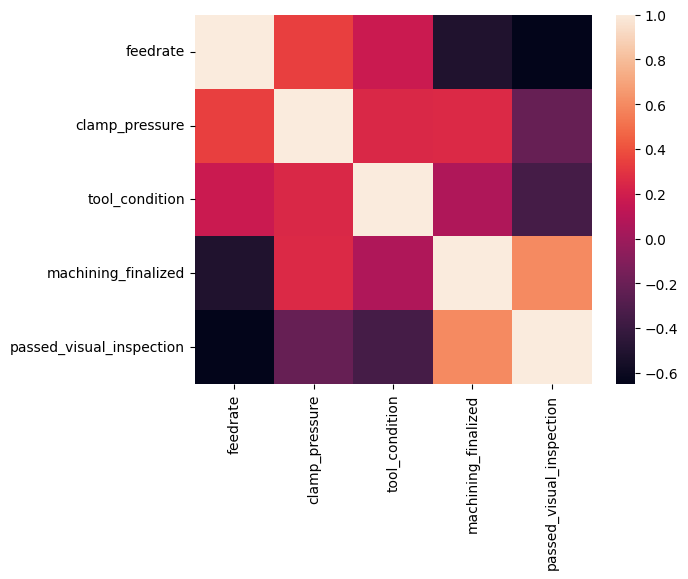

In [52]:
sns.heatmap(cormat)